In [7]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy import (integrate, optimize as op)
import scipy
from astropy import units as u
from astropy.table import Table
from glob import glob

import theano.tensor as tt

import matplotlib.pyplot as plt
import pymc3 as pm

from ccdproc import rebin as ccdproc_rebin


import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
cd ~/Downloads/Rot_Split-master\ 3

/Users/tawil10/Downloads/Rot_Split-master 3


In [19]:
model_s = Table.read("modelS.dat", format="ascii")


In [22]:
cd ..

/Users/tawil10/Downloads


In [24]:
data_sol = Table.read('sgk_model2_err_singlets-9-6400-hmi-32x.jsBo=0.dat',format='ascii')

In [27]:
data_sol

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16
int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,86,-83,3,0,0.968150138855,0.0374653488398,0.0758571103215,904.339860051,0.166765552974,0.0805217659852,0.0271517617667,0.557500874341,0.0288636627687,0.33611248064,0.0360999159046
0,86,-74,3,0,0.968150138855,0.0374653488398,0.0758571103215,908.756377232,0.155478845985,0.0872648756443,0.0271517617667,0.557500874341,0.0309954922454,0.333755816721,0.0361066398685
0,86,-70,3,0,0.968150138855,0.0374653488398,0.0758571103215,910.65778162,0.184501417573,0.084514613939,0.0271517617667,0.557500874341,0.0377855044077,0.331383110519,0.0361398301642
0,86,-64,3,0,0.968150138855,0.0374653488398,0.0758571103215,913.515446757,0.15534935458,0.0842206137159,0.0271517617667,0.557500874341,0.0389664460108,0.32920820466,0.0361225303727
0,86,-54,3,0,0.968150138855,0.0374653488398,0.0758571103215,918.312575838,0.298747443997,0.0909519483044,0.0271517617667,0.557500874341,0.0201765458812,0.347096944081,0.0361607731421
0,86,18,3,0,0.968150138855,0.0374653488398,0.0758571103215,951.118757141,0.184358136334,0.0724371300328,0.0271517617667,0.557500874341,0.0336354283303,0.317550732973,0.0360642812809
0,86,40,3,0,0.968150138855,0.0374653488398,0.0758571103215,961.248486718,0.207082566413,0.0961935819735,0.0271517617667,0.557500874341,0.029782714937,0.331745499622,0.036132688516
0,86,55,3,0,0.968150138855,0.0374653488398,0.0758571103215,968.267300022,0.257077524459,0.0981722426739,0.0271517617667,0.557500874341,0.0227896442301,0.341668013459,0.0361597589225
0,86,56,3,0,0.968150138855,0.0374653488398,0.0758571103215,968.759344516,0.195855120098,0.105380275132,0.0271517617667,0.557500874341,0.0352422238019,0.330619681933,0.0361420565059


In [28]:
n = data_sol['col1']
l =data_sol['col2']
m = data_sol['col3']
freq = data_sol['col9']
e = data_sol['col14']

In [ ]:
#setting up the splitting array
#for a given n and l, rot splitting will be given by;
#(sum of abs( freq of m mode - freq of m=0 mode)/abs(m))/number of oberved splittings
#number of observed splittings is given by the number with the same n,l modes -1


In [68]:
data_sol[data_sol['col1']==1]

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,n
int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
1,33,-25,3,0,0.384689748287,0.0283230505884,-0.0784858092666,920.130329351,0.295616715868,0.0905192536466,0.0259416603866,0.748481099545,0.0159432055364,0.414179810684,0.036650149654,0
1,33,21,3,0,0.384689748287,0.0283230505884,-0.0784858092666,941.271602161,0.219121301897,0.0954412318097,0.0259416603866,0.748481099545,0.0199818503904,0.395864355486,0.0366111241332,0
1,33,25,3,0,0.384689748287,0.0283230505884,-0.0784858092666,943.137475017,0.377248392946,0.0962993181632,0.0259416603866,0.748481099545,0.0173054353434,0.407097642683,0.0367679919071,0
1,33,32,3,0,0.384689748287,0.0283230505884,-0.0784858092666,946.540975784,0.301358379511,0.0876367453307,0.0259416603866,0.748481099545,0.0181697098837,0.400493631709,0.0367818147259,0
1,34,-30,3,0,0.386367797852,0.0298664849252,-0.101692028344,929.517197113,0.280076959392,0.0738476625387,0.0213868848311,0.516933796979,0.0172425120344,0.367556785815,0.0344671276384,0
1,34,-28,3,0,0.386367797852,0.0298664849252,-0.101692028344,930.500494,0.24969592702,0.0966406534361,0.0213868848311,0.516933796979,0.0243959975426,0.358811848077,0.0344721860637,0
1,34,-27,3,0,0.386367797852,0.0298664849252,-0.101692028344,930.974438051,0.272258210704,0.0826532763672,0.0213868848311,0.516933796979,0.0202321811634,0.360365960545,0.0344968441332,0
1,34,-25,3,0,0.386367797852,0.0298664849252,-0.101692028344,931.941190482,0.307462725307,0.0969661999251,0.0213868848311,0.516933796979,0.0191784727952,0.365190997626,0.0345196943281,0
1,34,-13,3,0,0.386367797852,0.0298664849252,-0.101692028344,937.538325941,0.158608411008,0.0830679041507,0.0213868848311,0.516933796979,0.0434811789785,0.345096812294,0.0344421112179,0


In [71]:
n = data_sol['col1']
for i in range(1,max(n)):
    ii = data_sol[n == i]
    l = ii['col2']
    for j in range(min(l),max(l)):
        jj = ii[l == j]
        run_avg = 0
        if (j!= 0):
            
            if np.isin(0,jj['col3']):
                ioi = np.where(jj['col3'] == 0)
                
                for mi in jj['col3']:
                    right_i = np.where(jj['col3']== mi)
                    if (mi != 0):
                        #print(np.abs(jj['col9'][right_i]),np.abs(jj['col9'][ioi]))
                        run_avg = run_avg + np.abs( jj['col9'][right_i] - jj['col9'][ioi])/np.abs(mi)
        
            else:
                if (np.shape(jj['col3'])[0]>2):
                    omeg = (jj['col9'][0]-jj['col9'][1])/(jj['col3'][0]-jj['col3'][1])
                    vee = jj['col9'][0] - jj['col3'][0]*omeg
                    for mi in jj['col3']:
                        right_i = np.where(jj['col3']== mi)
                        run_avg = run_avg + np.abs( jj['col9'][right_i] - vee)/np.abs(mi)
                else:
                    run_abg = 'nope'
        print(i,j,run_avg)
                
def is_even(num):
    return num % 2 == 0

1 33        col9       
------------------
1.8461544717405483
1 34        col9      
-----------------
4.120783580489785
1 35        col9      
-----------------
3.436304253744199
1 36        col9      
-----------------
6.421698278229335
1 37        col9      
-----------------
9.407368395116242
1 38        col9       
------------------
12.753495920074116
1 39        col9       
------------------
11.479131699853944
1 40        col9      
-----------------
20.85764883080724
1 41        col9       
------------------
15.947639965426461
1 42        col9      
-----------------
20.59395316091254
1 43        col9       
------------------
22.333127832217787
1 44        col9       
------------------
19.516355393218788
1 45        col9      
-----------------
22.75436744103839
1 46        col9      
-----------------
23.74261412840815
1 47        col9       
------------------
24.938461862208367
1 48        col9      
-----------------
26.57424697978317
1 49        col9      
------------

KeyboardInterrupt: 

In [50]:
data_sol

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,n
int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
0,86,-83,3,0,0.968150138855,0.0374653488398,0.0758571103215,904.339860051,0.166765552974,0.0805217659852,0.0271517617667,0.557500874341,0.0288636627687,0.33611248064,0.0360999159046,0
0,86,-74,3,0,0.968150138855,0.0374653488398,0.0758571103215,908.756377232,0.155478845985,0.0872648756443,0.0271517617667,0.557500874341,0.0309954922454,0.333755816721,0.0361066398685,0
0,86,-70,3,0,0.968150138855,0.0374653488398,0.0758571103215,910.65778162,0.184501417573,0.084514613939,0.0271517617667,0.557500874341,0.0377855044077,0.331383110519,0.0361398301642,0
0,86,-64,3,0,0.968150138855,0.0374653488398,0.0758571103215,913.515446757,0.15534935458,0.0842206137159,0.0271517617667,0.557500874341,0.0389664460108,0.32920820466,0.0361225303727,0
0,86,-54,3,0,0.968150138855,0.0374653488398,0.0758571103215,918.312575838,0.298747443997,0.0909519483044,0.0271517617667,0.557500874341,0.0201765458812,0.347096944081,0.0361607731421,0
0,86,18,3,0,0.968150138855,0.0374653488398,0.0758571103215,951.118757141,0.184358136334,0.0724371300328,0.0271517617667,0.557500874341,0.0336354283303,0.317550732973,0.0360642812809,0
0,86,40,3,0,0.968150138855,0.0374653488398,0.0758571103215,961.248486718,0.207082566413,0.0961935819735,0.0271517617667,0.557500874341,0.029782714937,0.331745499622,0.036132688516,0
0,86,55,3,0,0.968150138855,0.0374653488398,0.0758571103215,968.267300022,0.257077524459,0.0981722426739,0.0271517617667,0.557500874341,0.0227896442301,0.341668013459,0.0361597589225,0
0,86,56,3,0,0.968150138855,0.0374653488398,0.0758571103215,968.759344516,0.195855120098,0.105380275132,0.0271517617667,0.557500874341,0.0352422238019,0.330619681933,0.0361420565059,0


In [20]:
rho = model_s['rho']
r = model_s['r']

In [17]:
def kern(n,l):
    
    big_L_2 = l*(l+1)
    xi_r = load based on n and l
    xi_h = load based on n and l
    num = (xi_r**2 + big_L_2*xi_h**2 -2 * xi_h*xi_r * xi_h**2)*r**2*rho
    dom = np.trapz((xi_r**2 + big_L_2*xi_h**2 -2 * xi_h*xi_r * xi_h**2)*r**2*rho,r)
    return num/dom


def beta(n,l):
    
    big_L_2 = l*(l+1)
    xi_r = load based on n and l
    xi_h = load based on n and l
    dom = np.trapz((xi_r**2 + big_L_2*xi_h**2)*r**2*rho,r)
    num = np.trapz((xi_r**2 + big_L_2*xi_h**2 -2 * xi_h*xi_r * xi_h**2)*r**2*rho,r)
    return num/dom

SyntaxError: invalid syntax (<ipython-input-17-75200764ffb2>, line 4)

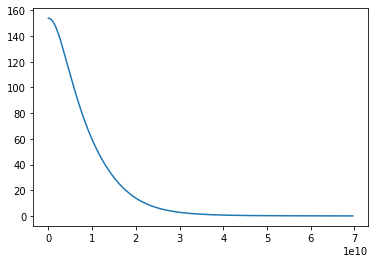

In [14]:
then we want to put all of the kernels into the same array

In [21]:
x = np.array(model_s['x'])
N = 400
# the number of points you think you can afford in your GP
S = int(x.size / N) # approx sampling size.


#true_omega = true_omega3

X = x
x = np.linspace(0,1,N)
x_diffs = np.hstack([0, np.diff(x)])

#l1_frequencies = np.array(freqs[:11])
#l2_frequencies = np.array(freqs[11:])
#l3_frequencies = np.array(freqs[44:])


from pysynphot import observation
from pysynphot import spectrum
 
def rebin_spec(wave, specin, wavnew):
    spec = spectrum.ArraySourceSpectrum(wave=wave, flux=specin)
    f = np.ones(len(wave))
    filt = spectrum.ArraySpectralElement(wave, f, waveunits='angstrom')
    obs = observation.Observation(spec, filt, binset=wavnew, force='taper')
 
    return obs.binflux

def frebin_1d(a):


    init_val = np.trapz(a,X)
    trans = rebin_spec(X+1,a,x+1)
    trans = trans/np.trapz(trans,x) * init_val


    return trans

def load_kernels(size=4000):
    #max_l = 1 + max([int(path.split(".")[1].split("_")[0]) for path in paths])
    #max_n = 1 + max([int(path.split(".")[-1]) for path in paths])

    kerns = np.nan * np.ones((15, size))
    #os.chdir('kerns')
    for i in range(15):
            path = "l.{l:.0f}_n.{n:.0f}".format(l=list_pairs[i,0], n=list_pairs[i,1])
            kerns[i, :] = rot_k_table[path]
    return kerns
    return kerns

kern = load_kernels()

kern_trans = np.apply_along_axis(frebin_1d, axis=1, arr=kern)

kern = kern_trans

#omega_trans = np.interp(x,X_rot,true_omega)
#true_omega = omega_trans

l_dict = {'1':[None,11],'2':[11,None]}



def pm_splittings(omega, l):

    
    l_bounds = l_dict[str(l)]
    
    lef = l_bounds[0]
    rig = l_bounds[1]
    
    area = 2*tt.dot(x_diffs,(omega*kern[lef:rig]).T)
    left_end = tt.dot(x_diffs[0],(omega[0]*kern[lef:rig,0]))
    right_end = tt.dot(x_diffs[-1],(omega[-1]*kern[lef:rig,-1]))
    area = tt.add(area,-left_end)
    area = tt.add(area,-right_end)
    print(betas[lef:rig].shape)
    return area/2 * betas[lef:rig]

def get_splittings(omega, l):
    
    l_bounds = l_dict[str(l)]
    
    lef = l_bounds[0]
    rig = l_bounds[1]
    
    area = np.trapz((omega * kern[lef:rig]),x)
    return area * betas[lef:rig]


#l1_splittings = np.array(obs[:10])*1e3
#l2_splittings = np.array(obs[11:])*1e3

e_l1_splittings = np.array(obs_table['e_delta'][:11])*1e3
e_l2_splittings = np.array(obs_table['e_delta'][11:])*1e3
#e_l3_splittings = np.array(err[44:])

l1_splittings = np.array(obs_table['delta'][:11])*1e3
l2_splittings = np.array(obs_table['delta'][11:])*1e3


#true_l1_splittings, true_l2_splittings,true_l3_splittings = get_splittings(true_omega,1),get_splittings(true_omega,2),get_splittings(true_omega,3)
#l1_splittings = true_l1_splittings + e_l1_splittings * np.random.normal(0, 1, size=true_l1_splittings.size)
#l2_splittings = true_l2_splittings + e_l2_splittings * np.random.normal(0, 1, size=true_l2_splittings.size)
#l3_splittings = true_l3_splittings + e_l3_splittings * np.random.normal(0, 1, size=true_l3_splittings.size)



#print(l1_frequencies.shape,l2_frequencies.shape,l1_splittings.shape,l2_splittings.shape,e_l1_splittings.shape,e_l2_splittings.shape) 

# A one dimensional column vector of inputs.
#X = x.reshape((-1, 1))

new_x = np.array(rot_k_table["x"])
N_latent = 200
S_latent = int(new_x.size / N_latent)





X = x
x = np.linspace(0,1,N)
x_diffs = np.hstack([0, np.diff(x)])



X_latent = x[:, None]

/Users/tawil10/opt/anaconda3/lib/python3.7/site-packages/pysynphot/locations.py:46: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
/Users/tawil10/opt/anaconda3/lib/python3.7/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


KeyboardInterrupt: 